In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/liver-tumor-segmentation/volume_pt3/volume-26.nii
/kaggle/input/liver-tumor-segmentation/volume_pt3/volume-27.nii
/kaggle/input/liver-tumor-segmentation/volume_pt3/volume-24.nii
/kaggle/input/liver-tumor-segmentation/volume_pt3/volume-23.nii
/kaggle/input/liver-tumor-segmentation/volume_pt3/volume-30.nii
/kaggle/input/liver-tumor-segmentation/volume_pt3/volume-25.nii
/kaggle/input/liver-tumor-segmentation/volume_pt3/volume-28.nii
/kaggle/input/liver-tumor-segmentation/volume_pt3/volume-21.nii
/kaggle/input/liver-tumor-segmentation/volume_pt3/volume-22.nii
/kaggle/input/liver-tumor-segmentation/volume_pt3/volume-29.nii
/kaggle/input/liver-tumor-segmentation/volume_pt2/volume-12.nii
/kaggle/input/liver-tumor-segmentation/volume_pt2/volume-20.nii
/kaggle/input/liver-tumor-segmentation/volume_pt2/volume-14.nii
/kaggle/input/liver-tumor-segmentation/volume_pt2/volume-11.nii
/kaggle/input/liver-tumor-segmentation/volume_pt2/volume-15.nii
/kaggle/input/liver-tumor-segmentation/v

In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import glob
import nibabel as nib
import cv2

from tqdm.notebook import tqdm

from PIL import Image

from fastai.basics import *
from fastai.vision.all import *
from fastai.data.transforms import *

import seaborn as sns
from tqdm.notebook import tqdm
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import albumentations as A
from albumentations.pytorch import ToTensorV2
from sklearn.model_selection import train_test_split

In [3]:
file_list = []
for dirname, _, filenames in os.walk('/kaggle/input/liver-tumor-segmentation/volume_pt1'):
    for filename in filenames:
        file_list.append((dirname, filename))
for dirname, _, filenames in os.walk('/kaggle/input/liver-tumor-segmentation/volume_pt2'):
    for filename in filenames:
        file_list.append((dirname, filename))
for dirname, _, filenames in os.walk('/kaggle/input/liver-tumor-segmentation/volume_pt3'):
    for filename in filenames:
        file_list.append((dirname, filename))
for dirname, _, filenames in os.walk('/kaggle/input/liver-tumor-segmentation/volume_pt4'):
    for filename in filenames:
        file_list.append((dirname, filename))
        
for dirname, _, filenames in os.walk('/kaggle/input/liver-tumor-segmentation/volume_pt5'):
    for filename in filenames:
        file_list.append((dirname, filename))
for dirname, _, filenames in os.walk('/kaggle/input/liver-tumor-segmentation/volume_pt6'):
    for filename in filenames:
        file_list.append((dirname, filename))
        
for dirname, _, filenames in os.walk('/kaggle/input/liver-tumor-segmentation/volume_pt7'):
    for filename in filenames:
        file_list.append((dirname, filename))
        
df_files = pd.DataFrame(file_list, columns=['dirname', 'filename'])
df_files.sort_values(by=['filename'], ascending=True)

,dirname,filename
6,/kaggle/input/liver-tumor-segmentation/volume_pt1,volume-0.nii
5,/kaggle/input/liver-tumor-segmentation/volume_pt1,volume-1.nii
4,/kaggle/input/liver-tumor-segmentation/volume_pt1,volume-10.nii
14,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-11.nii
11,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-12.nii
16,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-13.nii
13,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-14.nii
15,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-15.nii
20,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-16.nii
17,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-17.nii


In [4]:
df_files["mask_dirname"] = "" ; df_files["mask_filename"] = ""

for i in range(131):
    ct = f"volume-{i}.nii"
    mask = f"segmentation-{i}.nii"
    
    df_files.loc[df_files['filename'] == ct, 'mask_filename'] = mask
    df_files.loc[df_files['filename'] == ct, 'mask_dirname'] = df_files.loc[df_files['filename'] == ct, 'mask_dirname'] = '/kaggle/input/liver-tumor-segmentation/segmentations'

df_files_test= df_files[df_files.mask_filename=='']
# drop segment rows
df_files = df_files[df_files.mask_filename != ''].sort_values(by=['filename']).reset_index(drop=True) 
print(len(df_files))
df_files

51


,dirname,filename,mask_dirname,mask_filename
0,/kaggle/input/liver-tumor-segmentation/volume_pt1,volume-0.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-0.nii
1,/kaggle/input/liver-tumor-segmentation/volume_pt1,volume-1.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-1.nii
2,/kaggle/input/liver-tumor-segmentation/volume_pt1,volume-10.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-10.nii
3,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-11.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-11.nii
4,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-12.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-12.nii
5,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-13.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-13.nii
6,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-14.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-14.nii
7,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-15.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-15.nii
8,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-16.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-16.nii
9,/kaggle/input/liver-tumor-segmentation/volume_pt2,volume-17.nii,/kaggle/input/liver-tumor-segmentation/segmentations,segmentation-17.nii


In [5]:
def read_nii(filepath):
    ct_scan = nib.load(filepath)
    array   = ct_scan.get_fdata()
    array   = np.rot90(np.array(array))
    return(array)

In [6]:
sample = 0
sample_ct   = read_nii(df_files.loc[sample,'dirname']+"/"+df_files.loc[sample,'filename'])
sample_mask  = read_nii(df_files.loc[sample,'mask_dirname']+"/"+df_files.loc[sample,'mask_filename'])
print(sample_ct.shape) 
print(sample_mask.shape)

(512, 512, 75)
(512, 512, 75)


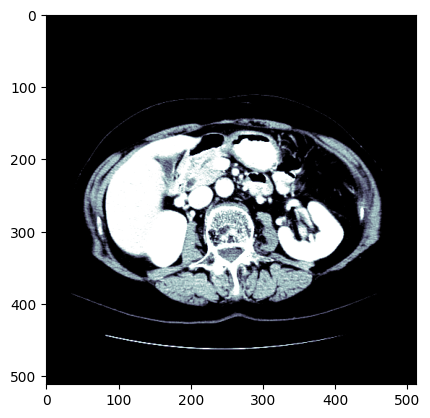

In [7]:
dicom_windows = types.SimpleNamespace(
    brain=(80,40),
    subdural=(254,100),
    stroke=(8,32),
    brain_bone=(2800,600),
    brain_soft=(375,40),
    lungs=(1500,-600),
    mediastinum=(350,50),
    abdomen_soft=(400,50),
    liver=(150,30),
    spine_soft=(250,50),
    spine_bone=(1800,400),
    custom = (200,60)
)

@patch
def windowed(self:Tensor, w, l):
    px = self.clone()
    px_min = l - w//2
    px_max = l + w//2
    px[px<px_min] = px_min
    px[px>px_max] = px_max
    return (px-px_min) / (px_max-px_min)

plt.imshow(tensor(sample_ct[...,50].astype(np.float32)).windowed(*dicom_windows.liver), cmap=plt.cm.bone);

In [8]:
def plot_sample(array_list, color_map = 'nipy_spectral'):

    fig = plt.figure(figsize=(18,15))

    plt.subplot(1,4,1)
    plt.imshow(array_list[0], cmap='bone')
    plt.title('Original Image')
    
    plt.subplot(1,4,2)
    plt.imshow(tensor(array_list[0].astype(np.float32)).windowed(*dicom_windows.liver), cmap='bone');
    plt.title('Windowed Image')
    
    plt.subplot(1,4,3)
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Mask')
    
    plt.subplot(1,4,4)
    plt.imshow(array_list[0], cmap='bone')
    plt.imshow(array_list[1], alpha=0.5, cmap=color_map)
    plt.title('Liver & Mask')


    plt.show()

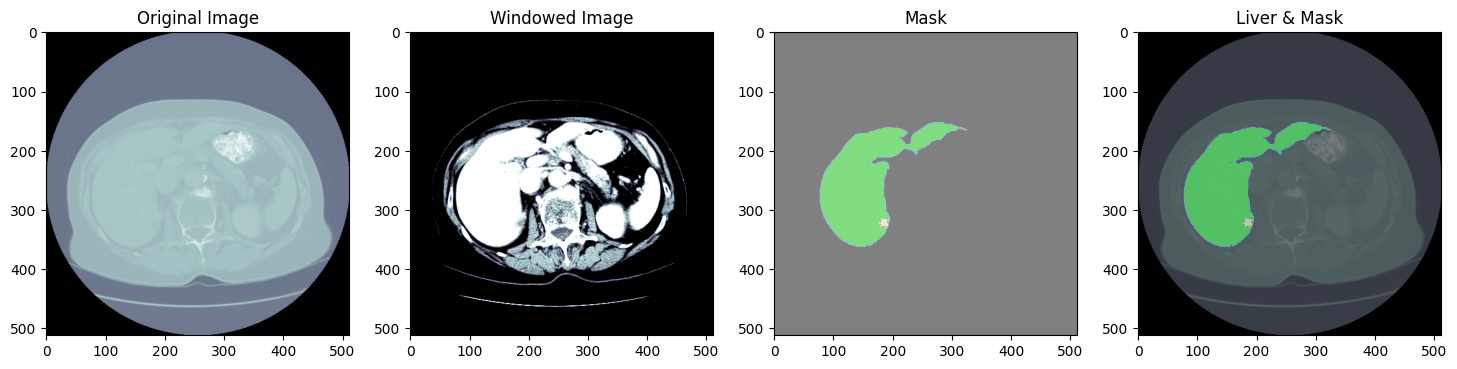

In [9]:
sample=56
sample_slice = tensor(sample_ct[...,sample].astype(np.float32))

plot_sample([sample_ct[...,sample], sample_mask[...,sample]])

<Axes: >

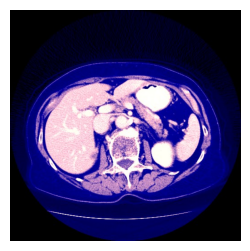

In [10]:
class TensorCTScan(TensorImageBW): _show_args = {'cmap':'bone'}

@patch
def freqhist_bins(self:Tensor, n_bins=100):
    ''''"A function to split the range of pixel values into groups, 
    such that each group has around the same number of pixels"'''
    imsd = self.view(-1).sort()[0]
    t = torch.cat([tensor([0.001]),
                   torch.arange(n_bins).float()/n_bins+(1/2/n_bins),
                   tensor([0.999])])
    t = (len(imsd)*t).long()
    return imsd[t].unique()
    
@patch
def hist_scaled(self:Tensor, brks=None):
    "Scales a tensor using `freqhist_bins` to values between 0 and 1"
    if self.device.type=='cuda': return self.hist_scaled_pt(brks)
    if brks is None: brks = self.freqhist_bins()
    ys = np.linspace(0., 1., len(brks))
    x = self.numpy().flatten()
    x = np.interp(x, brks.numpy(), ys)
    return tensor(x).reshape(self.shape).clamp(0.,1.)
@patch
def to_nchan(x:Tensor, wins, bins=None):
    res = [x.windowed(*win) for win in wins]
    if not isinstance(bins,int) or bins!=0: res.append(x.hist_scaled(bins).clamp(0,1))
    dim = [0,1][x.dim()==3]
    return TensorCTScan(torch.stack(res, dim=dim))

@patch
def save_jpg(x:(Tensor), path, wins, bins=None, quality=90):
    fn = Path(path).with_suffix('.jpg')
    x = (x.to_nchan(wins, bins)*255).byte()
    im = Image.fromarray(x.permute(1,2,0).numpy(), mode=['RGB','CMYK'][x.shape[0]==4])
    im.save(fn, quality=quality)

_,axs=subplots(1,1)

sample_slice.save_jpg('test.jpg', [dicom_windows.liver,dicom_windows.custom])
show_image(Image.open('test.jpg'), ax=axs[0])

In [11]:
import random

GENERATE_JPG_FILES = True   # warning: generation takes ~ 1h

if GENERATE_JPG_FILES:
    path = Path(".")

    os.makedirs('train_images', exist_ok=True)
    os.makedirs('train_masks', exist_ok=True)

    # Randomly select 1/3 of the indices
    random_indices = random.sample(range(len(df_files)), len(df_files) )

    for ii in tqdm(random_indices):  # take 1/3 nii files for training
        curr_ct = read_nii(df_files.loc[ii, 'dirname'] + "/" + df_files.loc[ii, 'filename'])
        curr_mask = read_nii(df_files.loc[ii, 'mask_dirname'] + "/" + df_files.loc[ii, 'mask_filename'])
        curr_file_name = str(df_files.loc[ii, 'filename']).split('.')[0]
        curr_dim = curr_ct.shape[2]  # 512, 512, curr_dim

        for curr_slice in range(0, curr_dim, 2):  # export every 2nd slice for training
            data = tensor(curr_ct[..., curr_slice].astype(np.float32))
            mask = Image.fromarray(curr_mask[..., curr_slice].astype('uint8'), mode="L")
            data.save_jpg(f"train_images/{curr_file_name}_slice_{curr_slice}.jpg", [dicom_windows.liver, dicom_windows.custom])
            mask.save(f"train_masks/{curr_file_name}_slice_{curr_slice}_mask.png")

  0%|          | 0/51 [00:00<?, ?it/s]

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


In [12]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from PIL import Image
from sklearn.model_selection import train_test_split

# Set the directories
images_dir = 'train_images'
masks_dir = 'train_masks'
# Get the list of image file names
all_image_file_names = sorted(os.listdir(images_dir))

# Randomly select 9000 images
selected_image_file_names = random.sample(all_image_file_names, 3000)

# Load selected images and masks with resizing
target_size = (256, 256)
images = [np.array(Image.open(os.path.join(images_dir, fname)).resize(target_size)) for fname in selected_image_file_names]

# Adjust file extension for masks
mask_file_names = [fname.replace('.jpg', '_mask.png') for fname in selected_image_file_names]
masks = [np.array(Image.open(os.path.join(masks_dir, fname)).resize(target_size)) for fname in mask_file_names]

# Convert the lists to numpy arrays
images = np.array(images)
masks = np.array(masks)

# Normalize images to [0, 1]
images = images / 255.0

# Reshape masks to include a channel dimension
masks = masks.reshape((masks.shape[0], masks.shape[1], masks.shape[2], 1))

2024-05-12 11:41:01.922606: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-12 11:41:01.922707: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-12 11:41:02.050752: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [13]:
images.shape


(3000, 256, 256, 3)

In [14]:
image_liver = []
mask_liver = []

# Iterate over each image in Y_train
for idx, img in enumerate(masks):
    # Check unique colors in the image
    unique_colors = np.unique(img)
    
    # If there are only 2 unique colors (black and white)
    if len(unique_colors) == 1:
        image_liver.append(images[idx])
        mask_liver.append(masks[idx])
    
    if len(unique_colors) == 2:
        image_liver.append(images[idx])
        
        # Create an image with only black background for Y_train2
        black_background = np.zeros_like(img)
        mask_liver.append(masks[idx])
    
    # If there are 3 unique colors (black, white, and grey)
    elif len(unique_colors) == 3:
        # Make grey pixels white in Y_train1
        image_liver.append(images[idx])
        
        # Keep only white pixels in Y_train2
        img_white_bg = np.where(img == 1, 2, img)
        mask_liver.append(img_white_bg)
        
        # Convert lists to numpy arrays
image_liver = np.array(image_liver)
mask_liver = np.array(mask_liver)

# Verify the shapes of the new datasets
print("image_liver shape:", image_liver.shape)
print("mask_liver shape:", mask_liver.shape)

image_liver shape: (3000, 256, 256, 3)
mask_liver shape: (3000, 256, 256, 1)


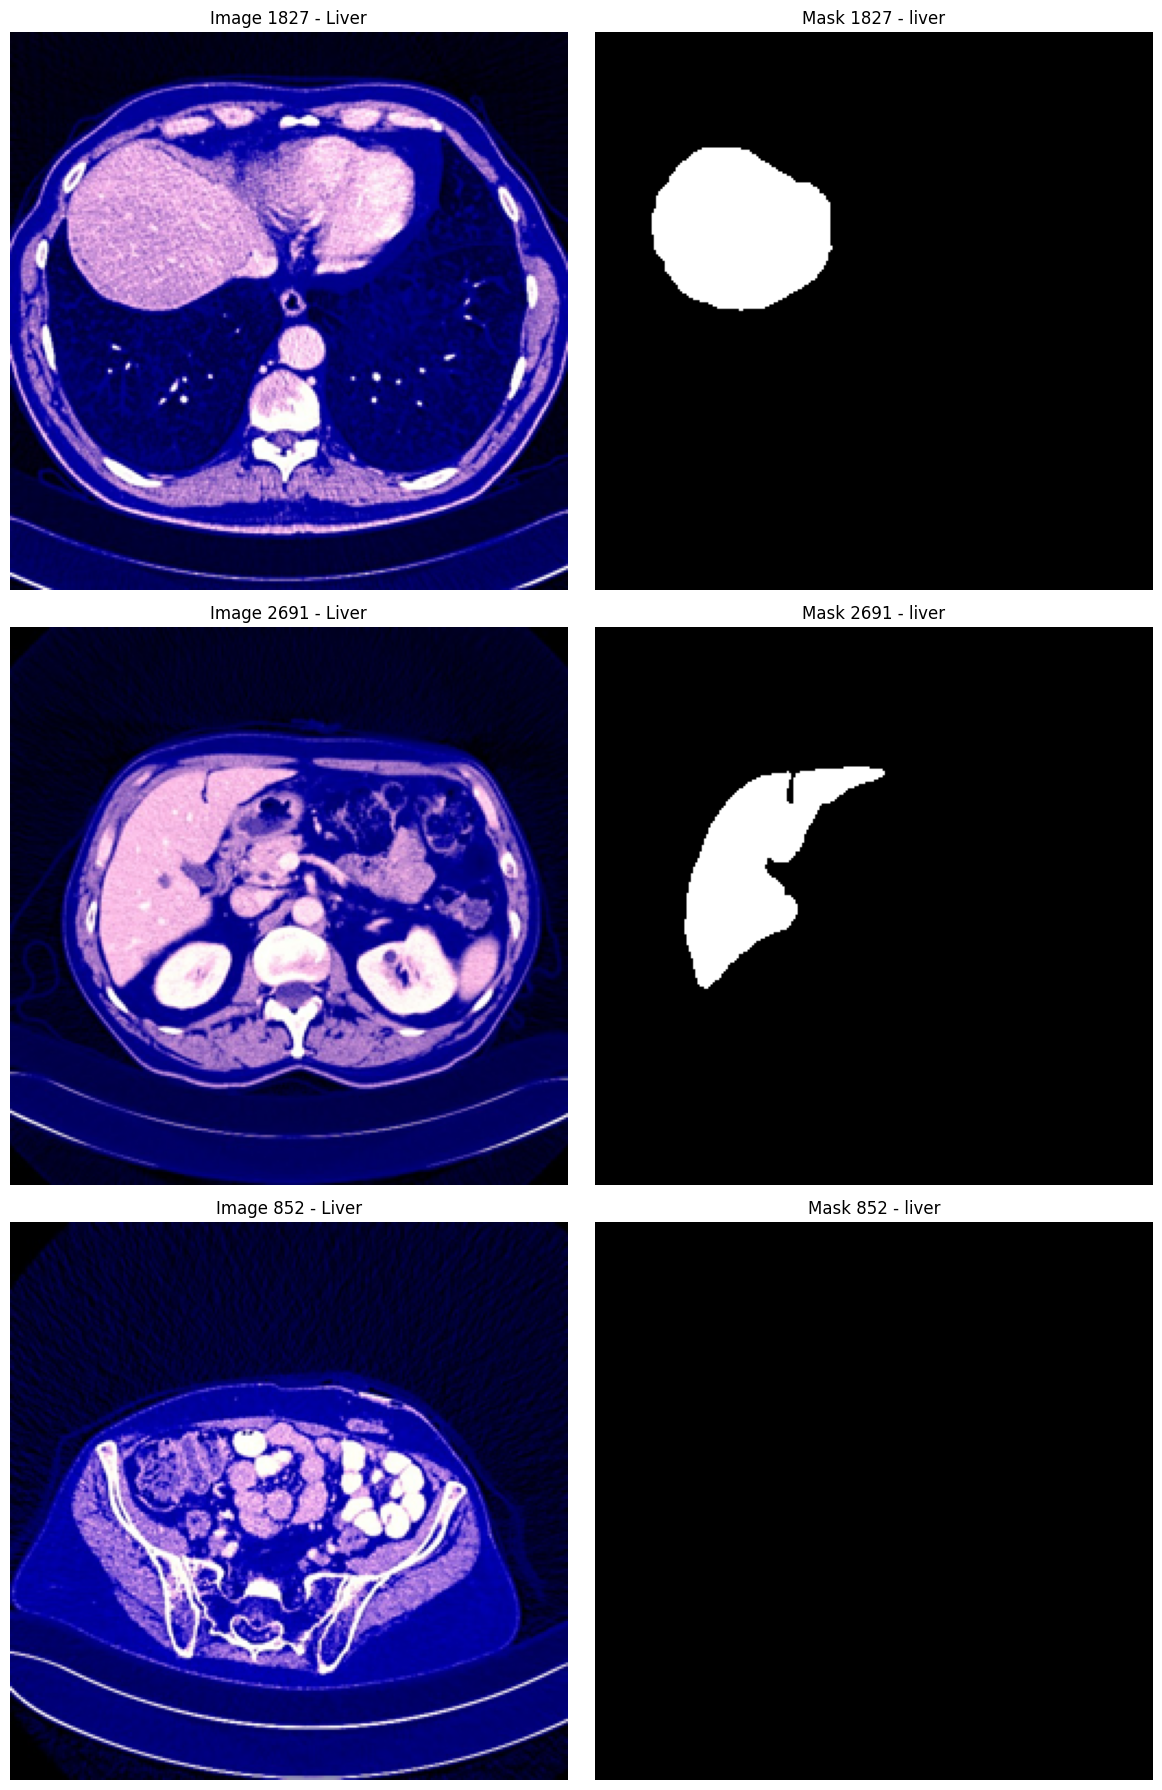

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming image_liver and mask_tumor are numpy arrays
# Ensure they have the same number of samples
num_samples = min(3, len(image_liver))

# Randomly select 3 indices
indices = np.random.choice(len(image_liver), num_samples, replace=False)

# Plotting
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))

for i, idx in enumerate(indices):
    axes[i, 0].imshow(image_liver[idx], cmap='gray')  # Assuming grayscale liver images
    axes[i, 0].set_title(f"Image {idx} - Liver")
    axes[i, 0].axis('off')
    
    axes[i, 1].imshow(mask_liver[idx], cmap='gray')  # Assuming grayscale tumor masks
    axes[i, 1].set_title(f"Mask {idx} - liver")
    axes[i, 1].axis('off')

plt.tight_layout()
plt.show()

In [17]:
x_train, x_temp, y_train, y_temp = train_test_split(image_liver, mask_liver, test_size=0.2, random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.4, random_state=42)

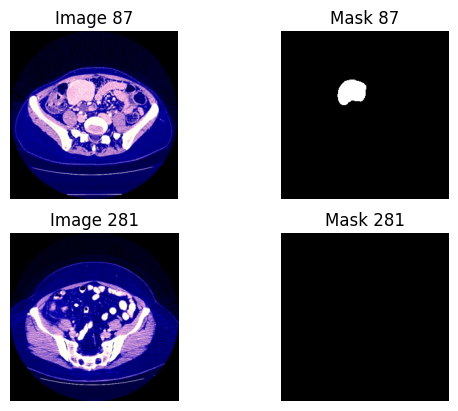

In [18]:
import matplotlib.pyplot as plt

# Function to display images and masks
def display_images_and_masks(images, masks, num_samples=2):
    # Randomly select samples
    sample_indices = random.sample(range(images.shape[0]), num_samples)

    for i in range(num_samples):
        index = sample_indices[i]

        # Display the image
        plt.subplot(num_samples, 2, 2 * i + 1)
        plt.imshow(images[index])
        plt.title("Image {}".format(index))
        plt.axis("off")

        # Display the mask
        plt.subplot(num_samples, 2, 2 * i + 2)
        plt.imshow(masks[index].squeeze(), cmap='gray')
        plt.title("Mask {}".format(index))
        plt.axis("off")

    plt.show()

# Display two random images and masks
display_images_and_masks(x_train, y_train)

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPooling2D, Concatenate, UpSampling2D, Dropout, Reshape
from tensorflow.keras.models import Model

def dense_block(x, filters, dropout_rate=0.2):
    x1 = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x1 = Conv2D(filters, (3, 3), padding='same', activation='relu')(x1)
    x = Concatenate()([x, x1])
    
    return x

def transition_down_block(x, filters, dropout_rate=0.2):
    x = Conv2D(filters, (1, 1), padding='same', activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    return x

def transition_up_block(x, filters, skip_connection, dropout_rate=0.2):
    x = UpSampling2D((2, 2))(x)
    x = Concatenate()([x, skip_connection])
    x = Conv2D(filters, (3, 3), padding='same', activation='relu')(x)
    
    return x

def build_densenet(input_shape=(256, 256, 3), dropout_rate=0.1):
    inputs = Input(shape=input_shape)
    
    # Initial convolution
    x = Conv2D(128, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    
    # Max pooling
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    # Dense block 1
    x = dense_block(x, 64)
    x1 = x
    x = transition_down_block(x, 128)
    
    # Dense block 2
    x = dense_block(x, 128)
    x2 = x
    x = transition_down_block(x, 256)

    # Upsampling
    x = transition_up_block(x, 256, x2)
    x = transition_up_block(x, 128, x1)
    #x = UpSampling2D((2, 2))(x)
    #x = UpSampling2D((2, 2))(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)


    
    # Final convolution
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(x)
    # Create model
    model = Model(inputs=inputs, outputs=outputs)
    
    return model

# Build DenseNet model
model = build_densenet(input_shape=(256, 256, 3), dropout_rate=0.2)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │     18,944 │ input_layer[0][0] │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 64, 64,    │     73,792 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64,    │     36,928 │ conv2d_1[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 64, 64,    │          0 │ max_pooling2d[0]… │
│ (Concatenate)       │ 192)              │            │ conv2d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 64, 64,    │     24,704 │ concatenate[0][0] │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 32, 32,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │     73,792 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 32, 32,    │     73,856 │ conv2d_4[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 32, 32,    │          0 │ max_pooling2d_1[… │
│ (Concatenate)       │ 256)              │            │ conv2d_5[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │     65,792 │ concatenate_1[0]… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 16, 16,    │          0 │ conv2d_6[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d       │ (None, 32, 32,    │          0 │ max_pooling2d_2[… │
│ (UpSampling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 32, 32,    │          0 │ up_sampling2d[0]… │
│ (Concatenate)       │ 512)              │            │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │  1,179,904 │ concatenate_2[0]… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_1     │ (None, 64, 64,    │          0 │ conv2d_7[0][0]  

 Total params: 2,156,609 (8.23 MB)

 Trainable params: 2,156,417 (8.23 MB)

 Non-trainable params: 192 (768.00 B)

In [20]:
import tensorflow.keras.backend as K

def combined_loss(y_true, y_pred):
    # Convert y_true to float32
    y_true = K.cast(y_true, dtype='float32')
    
    # Binary Crossentropy
    bce = K.mean(K.binary_crossentropy(y_true, y_pred), axis=-1)
    
    # Dice Coefficient
    smooth = 1.0
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    dice = (2.0 * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    
    # Combine the two losses
    combined_loss = bce - K.log(dice)
    
    return combined_loss

def dice_coefficient(y_true, y_pred):
    smooth = 1.0
    
    # Convert y_true to float32
    y_true = K.cast(y_true, dtype='float32')
    
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    union = K.sum(y_true_f) + K.sum(y_pred_f)
    
    dice = (2.0 * intersection + smooth) / (union + smooth)
    return dice


In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam

checkpoint = ModelCheckpoint("model10.keras", monitor='val_loss', verbose=1, save_best_only=True,
                             save_weights_only=False, mode='auto')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=1)

optimizer = Adam(learning_rate=0.0005)

model.compile(optimizer=optimizer, loss=combined_loss, metrics=['accuracy', dice_coefficient])

In [33]:
#ealystopping with 20-epochs
from keras.callbacks import EarlyStopping

try:
    print("Training started...")
    early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
    history = model.fit(x_train, y_train, epochs=20, batch_size=32,
                        validation_data=(x_valid, y_valid), 
                        callbacks=[reduce_lr, checkpoint, early_stop])
    print("Training completed successfully.")

    # Save the model
    model.save('model_final7.keras')
    print("Model saved successfully.")

except Exception as e:
    print(f"Error encountered during training: {e}")


Training started...
Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.9638 - dice_coefficient: 0.4740 - loss: 0.8545
Epoch 1: val_loss did not improve from 0.25589
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 160ms/step - accuracy: 0.9638 - dice_coefficient: 0.4742 - loss: 0.8541 - val_accuracy: 0.9667 - val_dice_coefficient: 0.4159 - val_loss: 1.1211 - learning_rate: 2.0000e-05
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.9633 - dice_coefficient: 0.5021 - loss: 0.7798
Epoch 2: val_loss did not improve from 0.25589
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 147ms/step - accuracy: 0.9633 - dice_coefficient: 0.5020 - loss: 0.7799 - val_accuracy: 0.9784 - val_dice_coefficient: 0.4028 - val_loss: 1.1428 - learning_rate: 2.0000e-05
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.9633 - dice_coefficient: 0.5103 - loss: 0.7738
Epoch 3: val_loss did not improve from 0.25589
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 148ms/step - accuracy: 0.9633 - dice_coefficient: 0.5102 - lo

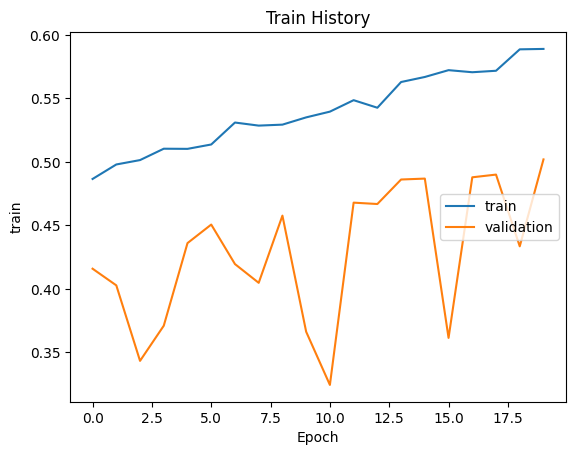

In [34]:
#15-epoch with early stopping
import matplotlib.pyplot as plt
def show_history(history, train, validation):
    plt.plot(history.history[train])
    plt.plot(history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()
show_history(history, 'dice_coefficient', 'val_dice_coefficient')

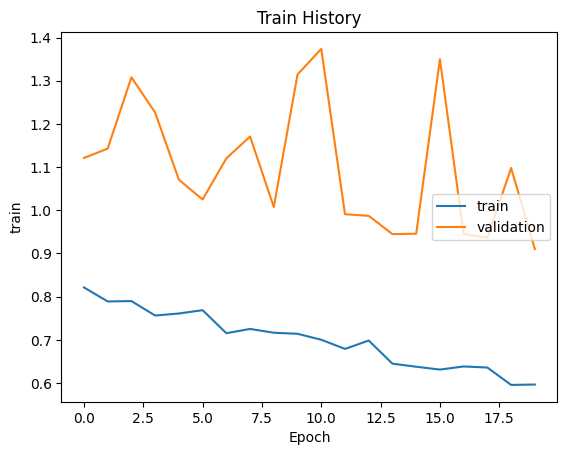

In [35]:
show_history(history, 'loss', 'val_loss')


In [36]:
scores = model.evaluate(x_valid, y_valid)
scores[1]

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9795 - dice_coefficient: 0.5619 - loss: 0.6696


0.979616105556488

In [37]:
prediction = model.predict(x_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [39]:
test_scores = model.evaluate(x_test, y_test)
test_scores[1]

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9791 - dice_coefficient: 0.5779 - loss: 0.6231


0.9789789319038391

In [49]:
#ealystopping with 20-epochs
from keras.callbacks import EarlyStopping

try:
    print("Training started...")
    early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
    history = model.fit(x_train, y_train, epochs=30, batch_size=32,
                        validation_data=(x_valid, y_valid), 
                        callbacks=[reduce_lr, checkpoint, early_stop])
    print("Training completed successfully.")

    # Save the model
    model.save('model_final7.keras')
    print("Model saved successfully.")

except Exception as e:
    print(f"Error encountered during training: {e}")


Training started...
Epoch 1/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.9707 - dice_coefficient: 0.5956 - loss: 0.5848
Epoch 1: val_loss did not improve from 0.25589
75/75 ━━━━━━━━━━━━━━━━━━━━ 12s 159ms/step - accuracy: 0.9707 - dice_coefficient: 0.5955 - loss: 0.5850 - val_accuracy: 0.9698 - val_dice_coefficient: 0.4942 - val_loss: 0.9318 - learning_rate: 2.0000e-05
Epoch 2/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.9725 - dice_coefficient: 0.5737 - loss: 0.6242
Epoch 2: val_loss did not improve from 0.25589
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 148ms/step - accuracy: 0.9725 - dice_coefficient: 0.5740 - loss: 0.6237 - val_accuracy: 0.9654 - val_dice_coefficient: 0.4844 - val_loss: 0.9598 - learning_rate: 2.0000e-05
Epoch 3/30
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.9697 - dice_coefficient: 0.6236 - loss: 0.5300
Epoch 3: val_loss did not improve from 0.25589
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 147ms/step - accuracy: 0.9697 - dice_coefficient: 0.6233 - lo

In [50]:
scores = model.evaluate(x_valid, y_valid)
scores[1]

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9741 - dice_coefficient: 0.6179 - loss: 0.5602


0.9745127558708191

In [51]:
prediction = model.predict(x_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [52]:
test_scores = model.evaluate(x_test, y_test)
test_scores[1]

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9757 - dice_coefficient: 0.6542 - loss: 0.4828


0.9755061864852905

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


<Figure size 1200x400 with 0 Axes>

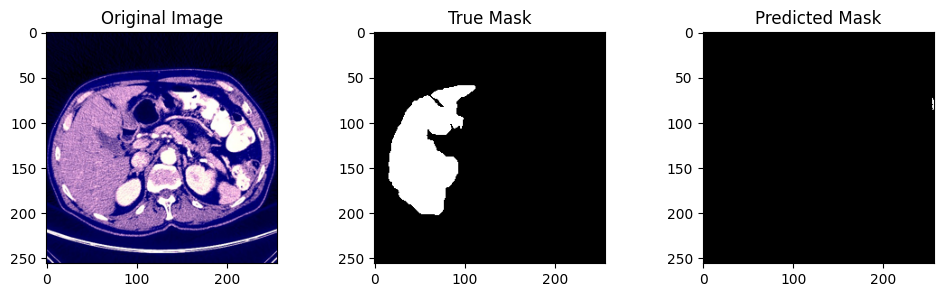

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have x_test and y_test
# Replace this with the actual index of the image you want to visualize
image_index = 90

# Load the image and true mask
input_image = x_test[image_index]
true_mask = y_test[image_index]

# Obtain the predicted mask from model2
predicted_mask = model.predict(np.expand_dims(input_image, axis=0))[0]

# Threshold the predicted mask (assuming it's a binary mask)
threshold = 0.1  # Adjust this threshold based on your model's output
predicted_mask_binary = (predicted_mask > threshold).astype(np.uint8)

# Plotting
plt.figure(figsize=(12, 4))


# Plotting
plt.figure(figsize=(12, 3))

# Plot original image
plt.subplot(1, 3, 1)
plt.imshow(input_image)
plt.title('Original Image')
# Plot true mask
plt.subplot(1, 3, 2)
plt.imshow(true_mask[:, :, 0], cmap='gray')
plt.title('True Mask')

# Plot predicted mask
plt.subplot(1,3, 3)
plt.imshow(predicted_mask_binary, cmap='gray')
plt.title('Predicted Mask')


plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


<Figure size 1200x400 with 0 Axes>

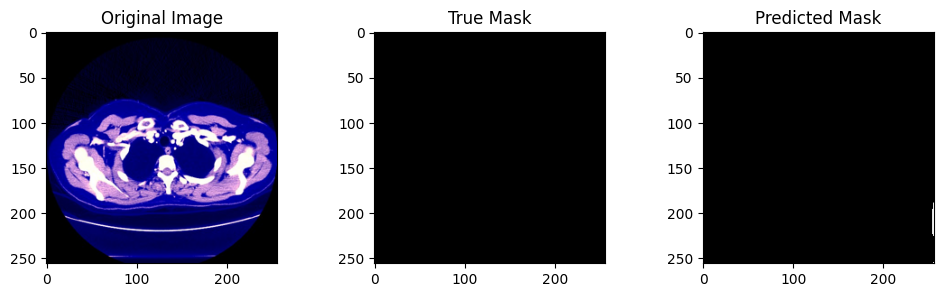

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have x_test and y_test
# Replace this with the actual index of the image you want to visualize
image_index = 78

# Load the image and true mask
input_image = x_test[image_index]
true_mask = y_test[image_index]

# Obtain the predicted mask from model2
predicted_mask = model.predict(np.expand_dims(input_image, axis=0))[0]

# Threshold the predicted mask (assuming it's a binary mask)
threshold = 0.1  # Adjust this threshold based on your model's output
predicted_mask_binary = (predicted_mask > threshold).astype(np.uint8)

# Plotting
plt.figure(figsize=(12, 4))


# Plotting
plt.figure(figsize=(12, 3))

# Plot original image
plt.subplot(1, 3, 1)
plt.imshow(input_image)
plt.title('Original Image')
# Plot true mask
plt.subplot(1, 3, 2)
plt.imshow(true_mask[:, :, 0], cmap='gray')
plt.title('True Mask')

# Plot predicted mask
plt.subplot(1,3, 3)
plt.imshow(predicted_mask_binary, cmap='gray')
plt.title('Predicted Mask')


plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


<Figure size 1200x400 with 0 Axes>

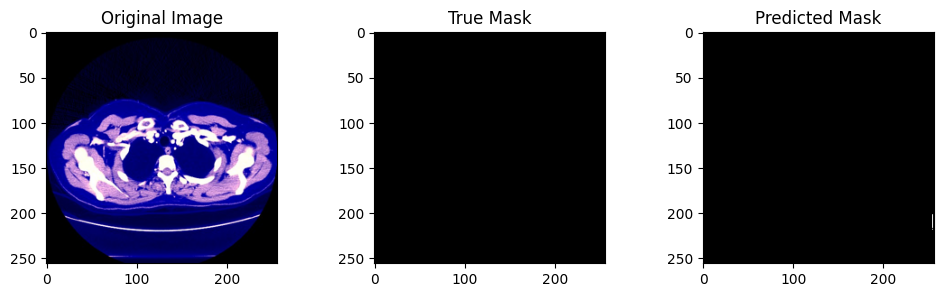

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have x_test and y_test
# Replace this with the actual index of the image you want to visualize
image_index = 78

# Load the image and true mask
input_image = x_test[image_index]
true_mask = y_test[image_index]

# Obtain the predicted mask from model2
predicted_mask = model.predict(np.expand_dims(input_image, axis=0))[0]

# Threshold the predicted mask (assuming it's a binary mask)
threshold = 0.1  # Adjust this threshold based on your model's output
predicted_mask_binary = (predicted_mask > threshold).astype(np.uint8)

# Plotting
plt.figure(figsize=(12, 4))


# Plotting
plt.figure(figsize=(12, 3))

# Plot original image
plt.subplot(1, 3, 1)
plt.imshow(input_image)
plt.title('Original Image')
# Plot true mask
plt.subplot(1, 3, 2)
plt.imshow(true_mask[:, :, 0], cmap='gray')
plt.title('True Mask')

# Plot predicted mask
plt.subplot(1,3, 3)
plt.imshow(predicted_mask_binary, cmap='gray')
plt.title('Predicted Mask')


plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


<Figure size 1200x400 with 0 Axes>

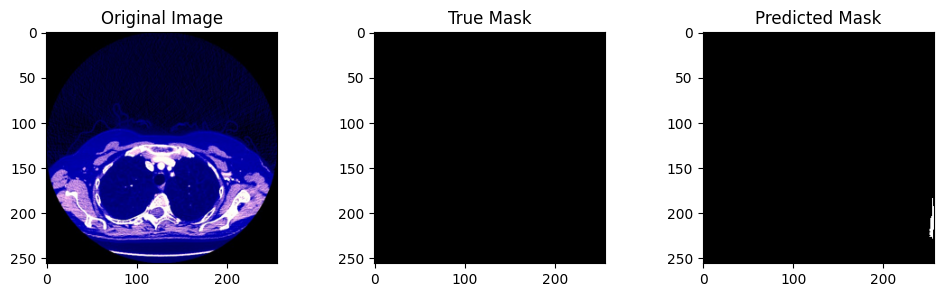

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have x_test and y_test
# Replace this with the actual index of the image you want to visualize
image_index = 40

# Load the image and true mask
input_image = x_test[image_index]
true_mask = y_test[image_index]

# Obtain the predicted mask from model2
predicted_mask = model.predict(np.expand_dims(input_image, axis=0))[0]

# Threshold the predicted mask (assuming it's a binary mask)
threshold = 0.1  # Adjust this threshold based on your model's output
predicted_mask_binary = (predicted_mask > threshold).astype(np.uint8)

# Plotting
plt.figure(figsize=(12, 4))


# Plotting
plt.figure(figsize=(12, 3))

# Plot original image
plt.subplot(1, 3, 1)
plt.imshow(input_image)
plt.title('Original Image')
# Plot true mask
plt.subplot(1, 3, 2)
plt.imshow(true_mask[:, :, 0], cmap='gray')
plt.title('True Mask')

# Plot predicted mask
plt.subplot(1,3, 3)
plt.imshow(predicted_mask_binary, cmap='gray')
plt.title('Predicted Mask')


plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


<Figure size 1200x400 with 0 Axes>

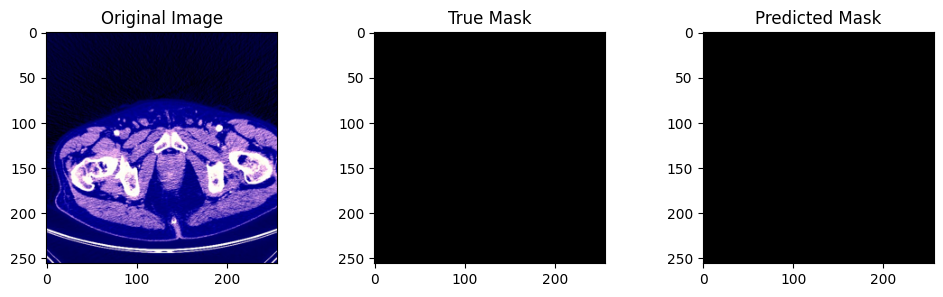

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have x_test and y_test
# Replace this with the actual index of the image you want to visualize
image_index = 70

# Load the image and true mask
input_image = x_test[image_index]
true_mask = y_test[image_index]

# Obtain the predicted mask from model2
predicted_mask = model.predict(np.expand_dims(input_image, axis=0))[0]

# Threshold the predicted mask (assuming it's a binary mask)
threshold = 0.1  # Adjust this threshold based on your model's output
predicted_mask_binary = (predicted_mask > threshold).astype(np.uint8)

# Plotting
plt.figure(figsize=(12, 4))


# Plotting
plt.figure(figsize=(12, 3))

# Plot original image
plt.subplot(1, 3, 1)
plt.imshow(input_image)
plt.title('Original Image')
# Plot true mask
plt.subplot(1, 3, 2)
plt.imshow(true_mask[:, :, 0], cmap='gray')
plt.title('True Mask')

# Plot predicted mask
plt.subplot(1,3, 3)
plt.imshow(predicted_mask_binary, cmap='gray')
plt.title('Predicted Mask')


plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


<Figure size 1200x400 with 0 Axes>

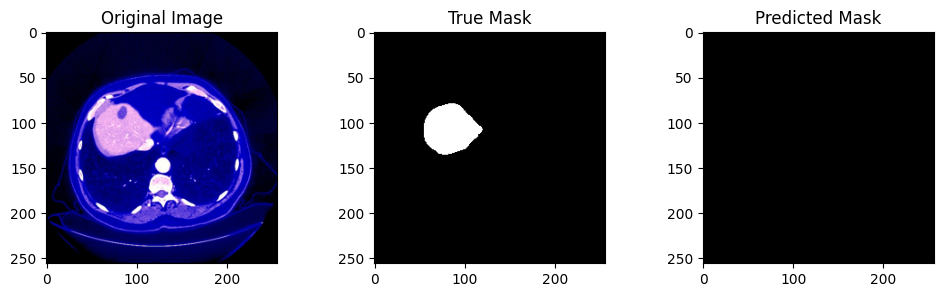

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have x_test and y_test
# Replace this with the actual index of the image you want to visualize
image_index = 100

# Load the image and true mask
input_image = x_test[image_index]
true_mask = y_test[image_index]

# Obtain the predicted mask from model2
predicted_mask = model.predict(np.expand_dims(input_image, axis=0))[0]

# Threshold the predicted mask (assuming it's a binary mask)
threshold = 0.1  # Adjust this threshold based on your model's output
predicted_mask_binary = (predicted_mask > threshold).astype(np.uint8)

# Plotting
plt.figure(figsize=(12, 4))


# Plotting
plt.figure(figsize=(12, 3))

# Plot original image
plt.subplot(1, 3, 1)
plt.imshow(input_image)
plt.title('Original Image')
# Plot true mask
plt.subplot(1, 3, 2)
plt.imshow(true_mask[:, :, 0], cmap='gray')
plt.title('True Mask')

# Plot predicted mask
plt.subplot(1,3, 3)
plt.imshow(predicted_mask_binary, cmap='gray')
plt.title('Predicted Mask')


plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


<Figure size 1200x400 with 0 Axes>

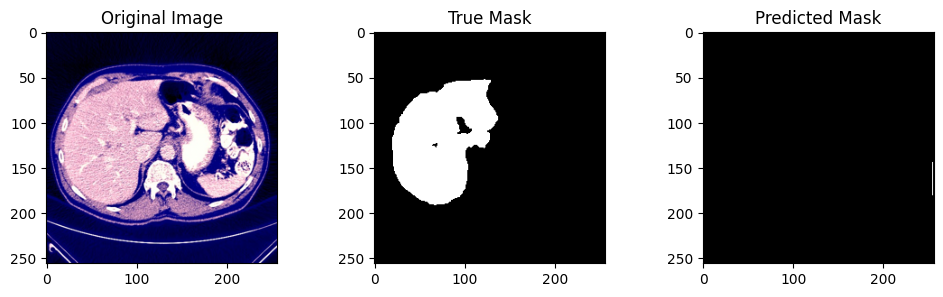

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have x_test and y_test
# Replace this with the actual index of the image you want to visualize
image_index = 120

# Load the image and true mask
input_image = x_test[image_index]
true_mask = y_test[image_index]

# Obtain the predicted mask from model2
predicted_mask = model.predict(np.expand_dims(input_image, axis=0))[0]

# Threshold the predicted mask (assuming it's a binary mask)
threshold = 0.1  # Adjust this threshold based on your model's output
predicted_mask_binary = (predicted_mask > threshold).astype(np.uint8)

# Plotting
plt.figure(figsize=(12, 4))


# Plotting
plt.figure(figsize=(12, 3))

# Plot original image
plt.subplot(1, 3, 1)
plt.imshow(input_image)
plt.title('Original Image')
# Plot true mask
plt.subplot(1, 3, 2)
plt.imshow(true_mask[:, :, 0], cmap='gray')
plt.title('True Mask')

# Plot predicted mask
plt.subplot(1,3, 3)
plt.imshow(predicted_mask_binary, cmap='gray')
plt.title('Predicted Mask')


plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


<Figure size 1200x400 with 0 Axes>

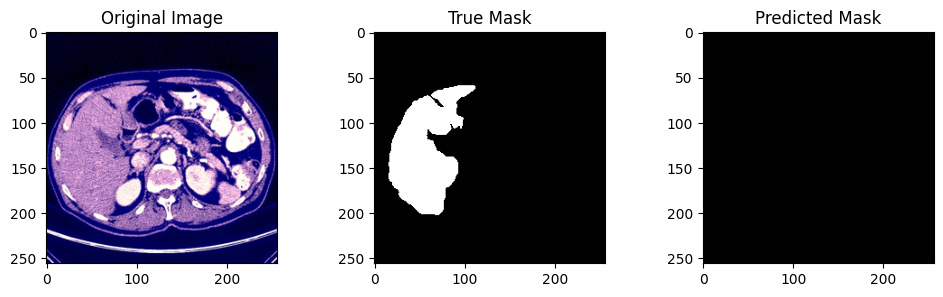

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have x_test and y_test
# Replace this with the actual index of the image you want to visualize
image_index = 90

# Load the image and true mask
input_image = x_test[image_index]
true_mask = y_test[image_index]

# Obtain the predicted mask from model2
predicted_mask = model.predict(np.expand_dims(input_image, axis=0))[0]

# Threshold the predicted mask (assuming it's a binary mask)
threshold = 0.1  # Adjust this threshold based on your model's output
predicted_mask_binary = (predicted_mask > threshold).astype(np.uint8)

# Plotting
plt.figure(figsize=(12, 4))


# Plotting
plt.figure(figsize=(12, 3))

# Plot original image
plt.subplot(1, 3, 1)
plt.imshow(input_image)
plt.title('Original Image')
# Plot true mask
plt.subplot(1, 3, 2)
plt.imshow(true_mask[:, :, 0], cmap='gray')
plt.title('True Mask')

# Plot predicted mask
plt.subplot(1,3, 3)
plt.imshow(predicted_mask_binary, cmap='gray')
plt.title('Predicted Mask')


plt.show()